## Import library

In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Import data

In [14]:
df = pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## PreProccessing Data

In [15]:
# apakah ada nilai null
null_count = df.isnull().sum()
print("nilai null : ", null_count)

nilai null :  ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [16]:
# melihat apakah tipe datanya sudah sesuai
print(df.dtypes)

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


In [17]:
# melihat nilai unik dari kolom kategorikal
print('CLASS sebelum diubah : ', df['CLASS'].unique())
print('Gender sebelum diubah', df['Gender'].unique())

# menghilangkan spasi dalam kolom CLASS agar data konsisten
df['CLASS'] = df['CLASS'].str.strip()

# membuat value gender menjadi uppercase agar data konsisten
df['Gender'] = df['Gender'].str.upper()

print('\nCLASS sesudah diubah', df['CLASS'].unique())
print('Gender sesudah diubah', df['Gender'].unique())

CLASS sebelum diubah :  ['N' 'N ' 'P' 'Y' 'Y ']
Gender sebelum diubah ['F' 'M' 'f']

CLASS sesudah diubah ['N' 'P' 'Y']
Gender sesudah diubah ['F' 'M']


In [18]:
# konversi label Gender menjadi numerik menggunakan label encoding
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
display(df['Gender'])

0      0
1      1
2      0
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64

In [19]:
# hapus attribute yang tidak perlu
df = df.drop(['ID', 'No_Pation'], axis=1)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Visualisasi Dataset

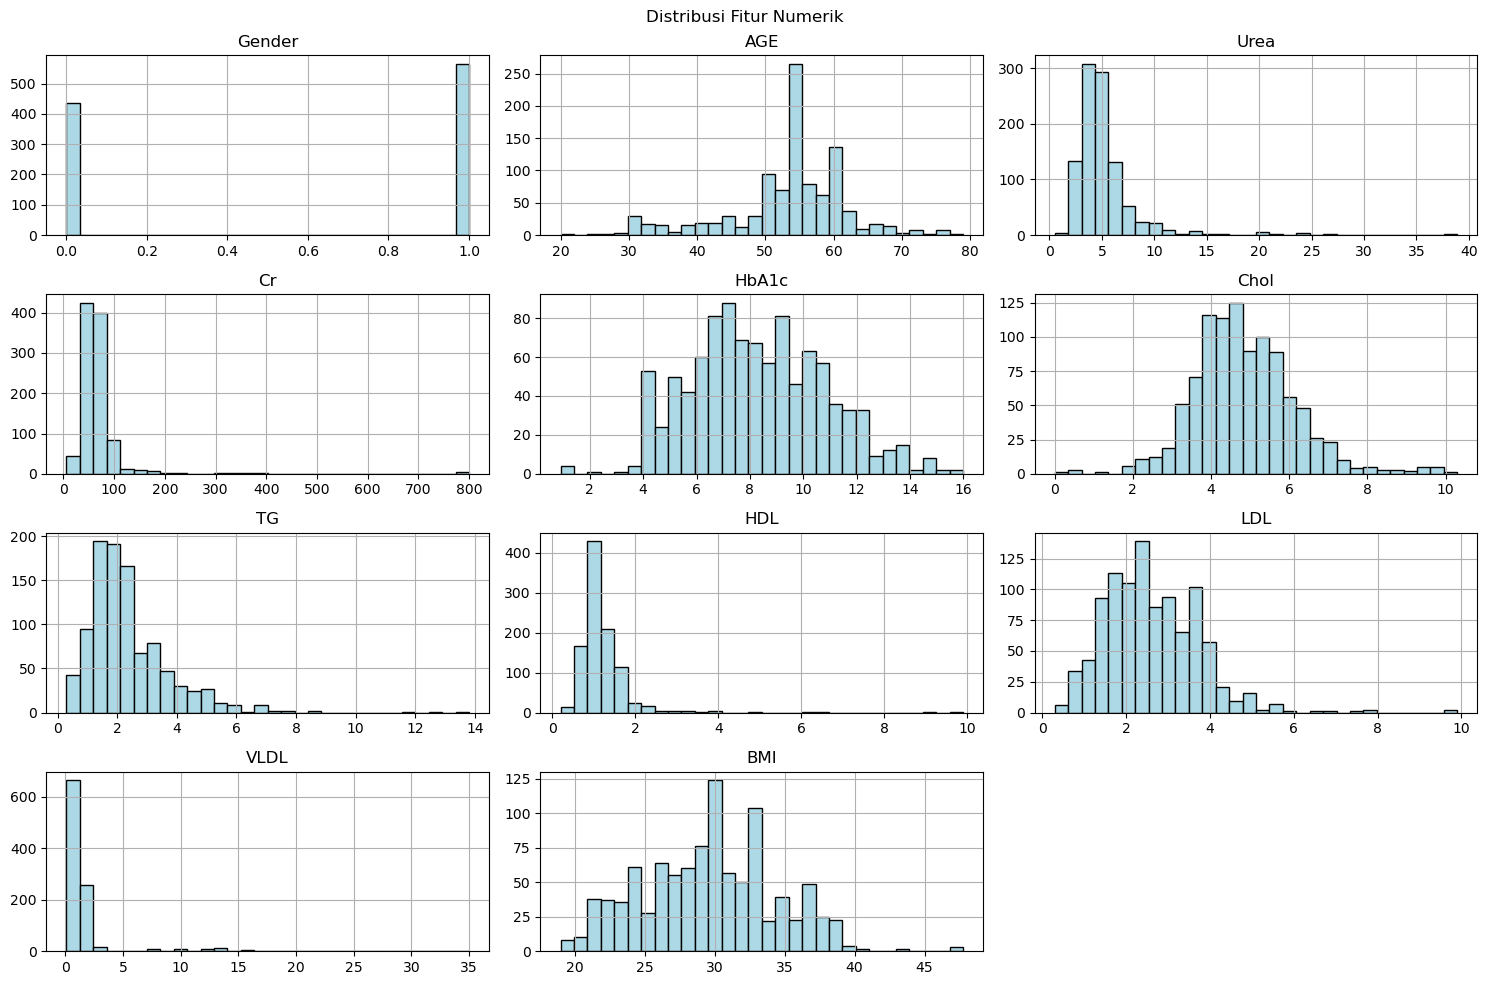

In [20]:
# --- 1. Distribusi Fitur Numerik ---
# Menampilkan histogram untuk setiap fitur numerik
df_numerical = df.drop('CLASS', axis=1)  # Menghapus kolom 'CLASS' untuk fokus pada fitur numerik
df_numerical.hist(bins=30, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout()
plt.show()

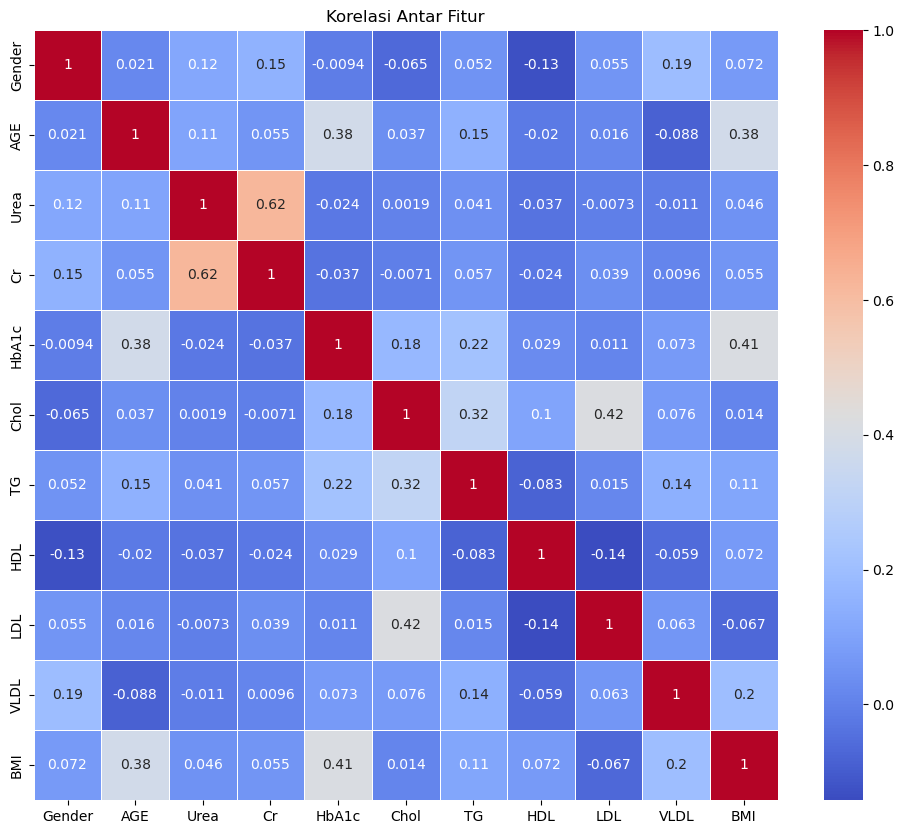

In [21]:
# 3. Visualisasi Hubungan Antar Fitur
# Correlation heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_202876\3265762454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS', data=df, palette='Set1')


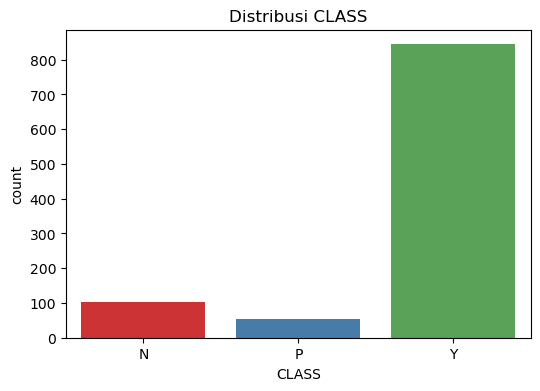

In [22]:
# 4. Visualisasi Distribusi 'CLASS'
# Visualisasi distribusi dari label 'CLASS'
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=df, palette='Set1')
plt.title('Distribusi CLASS')
plt.show()

## Split data

In [23]:
# Memisah attribute dengan label
X = df.drop(['CLASS'], axis=1)  # attribute (fitur)
y = df[['CLASS']]# label

# Pembagian data: 80% untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset setelah pembagian
print(f'Size of training set: {X_train.shape[0]}')
print(f'Size of test set: {X_test.shape[0]}')

Size of training set: 800
Size of test set: 200


## Melatih Model
## Random, Forest Logistic Regression, K-Nearest Neighbors

In [24]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import os

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Fungsi untuk menyimpan model ke file .pkl
def save_model(model, model_name):
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}.pkl')

# Fungsi untuk memuat model dari file .pkl
def load_model(model_name):
    if os.path.exists(f'{model_name.lower().replace(" ", "_")}.pkl'):
        return joblib.load(f'{model_name.lower().replace(" ", "_")}.pkl')
    else:
        return None

# Melatih dan menguji setiap model
for model_name, model in models.items():
    # Cek apakah model sudah ada dalam file .pkl
    loaded_model = load_model(model_name)
    
    if loaded_model is not None:
        # Jika model sudah ada, gunakan model yang dimuat
        model = loaded_model
        print(f"Memuat model {model_name} dari file .pkl\n")
    else:
        # Jika model belum ada, latih model dan simpan ke file .pkl
        print(f"Melatih model {model_name}...\n")
        model.fit(X_train, y_train)
        save_model(model, model_name)
    
    # Menguji model training
    y_train_predict = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_predict)
    print(f'Akurasi model training {model_name}: {train_accuracy:.2f}\n\n')
    print(f'Laporan klasifikasi {model_name} (Training):\n{classification_report(y_train, y_train_predict)}')

    # Menguji model testing
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi model testing {model_name}: {accuracy:.2f}\n\n')
    print(f'Laporan klasifikasi {model_name} (Testing):\n{classification_report(y_test, y_pred)}')


Memuat model Random Forest dari file .pkl

Akurasi model training Random Forest: 1.00


Laporan klasifikasi Random Forest (Training):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        82
           P       1.00      1.00      1.00        47
           Y       1.00      1.00      1.00       671

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Akurasi model testing Random Forest: 0.98


Laporan klasifikasi Random Forest (Testing):
              precision    recall  f1-score   support

           N       0.95      0.90      0.93        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200

Memuat model Lo